# Categorical clustering

Notebook to test different clustering methods with categorical datasets.

In order to make the R models work, you will have to manually change the global path so that it finds them in your files. (R version is 3.6.3)
(It HAS to be a global path)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, Birch, OPTICS
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from qluster import Qluster
import subprocess
path = './Datasets/OHEMushroom.csv'
path_sol = './Datasets/OHEMushroomSol.csv'
#path = './Datasets/OHEGermanData.csv'
#path_sol = './Datasets/OHEGermanDataSol.csv'

Num GPUs Available: 0 .

The tensorflow version is 2.6.0.

The scikit-learn version is 0.24.2.

The matplotlib version is 3.4.2.



## Load data

In [10]:
#Load OHE variable data
df = pd.read_csv(path)
df = df.drop('Unnamed: 0',axis = 1)
#Load and select edibility
df_sol = pd.read_csv(path_sol)
#edibility = np.array([0 if x == 'e' else 1 for x in df_sol.loc[:,'edible']])
#edibility.shape
clas = np.array(df_sol.loc[:,'edible'])
df_bool = np.array(df, dtype=bool)#For silhouette score and pairwise distances
train = df.iloc[:8000,:]
test = df.iloc[8000:,:]

## K-means

In [3]:
#Cluster and obtain labels
kmeans = KMeans(n_clusters=10, random_state = 273).fit(df)
clustering_kmeans = kmeans.labels_
#Calculate and print contingency table
data_crosstab = pd.crosstab(clustering_kmeans, 
                            clas,
                                margins = False)
print(data_crosstab.transpose())
#Calculate and print purity
cm_kmeans = np.array(data_crosstab)
purity_kmeans = np.sum(np.amax(cm_kmeans, axis = 1))/np.sum(cm_kmeans)
print(f'Purity: {round(purity_kmeans, 6)}')
#Calculate silhouette score
sil_kmeans = silhouette_score(df_bool, clustering_kmeans, metric='euclidean')
print(f'Silhouette score: {sil_kmeans}')

row_0    0    1     2    3     4    5    6    7    8    9
col_0                                                    
e      768    0     0  528  1728  192  704   48    0  240
p        0  864  1296  124     0    0    0  896  288  448
Purity: 0.949286
Silhouette score: 0.21099218185388158


## DBSCAN

In [4]:
#Cluster and obtain labels
dbscan = DBSCAN(eps=2, min_samples=10).fit(df)
clustering_dbscan = dbscan.labels_
#Calculate and print contingency table
data_crosstab = pd.crosstab(clustering_dbscan, 
                            clas,
                                margins = False)
print(data_crosstab.transpose())
#Calculate and print purity
cm_dbscan = np.array(data_crosstab)
purity_dbscan = np.sum(np.amax(cm_dbscan, axis = 1))/np.sum(cm_dbscan)
print(f'Purity: {round(purity_dbscan, 6)}')
#Calculate silhouette score
sil_dbscan = silhouette_score(df_bool, clustering_dbscan, metric='euclidean')
print(f'Silhouette score: {sil_dbscan}')

row_0  -1    0    1     2     3    4    5     6    7    8    9    10   11  \
col_0                                                                       
e        0  896  768  1728     0    0  192     0   48   32   48    0  192   
p       16  448    0     0  1296  288    0  1728    0   72    0   32    0   

row_0   12   13   14  
col_0                 
e      288    0   16  
p        0   36    0  
Purity: 0.940916
Silhouette score: 0.24210148743140913


## OPTICS

In [5]:
optics = OPTICS(min_samples=10).fit(df)
clustering_optics = optics.labels_
#Calculate and print contingency table
data_crosstab = pd.crosstab(clustering_optics, 
                            clas,
                                margins = False)
print(data_crosstab.transpose())
#Calculate and print purity
cm_optics = np.array(data_crosstab)
purity_optics = np.sum(np.amax(cm_optics, axis = 1))/np.sum(cm_optics)
print(f'Purity: {round(purity_optics, 6)}')
#Calculate silhouette score
sil_optics = silhouette_score(df_bool, clustering_optics, metric='euclidean')
print(f'Silhouette score: {sil_optics}')

row_0  -1    0    1    2    3     4    5    6    7    8    9    10   11   12  \
col_0                                                                          
e      478    0  512  192    0  1728    0  768   32  134    0  101   48    0   
p      180  256    0    0  192     0  288    0    0    0   72    0    0   32   

row_0    13    14   15   16   17   18  
col_0                                  
e         0     0   48   16  151    0  
p      1564  1296    0    0    0   36  
Purity: 0.977843
Silhouette score: 0.2295400666866592


## BIRCH

In [6]:
birch = Birch(n_clusters=10).fit(df)
clustering_birch = birch.labels_
#Calculate and print contingency table
data_crosstab = pd.crosstab(clustering_birch, 
                            clas,
                                margins = False)
print(data_crosstab.transpose())
#Calculate and print purity
cm_birch = np.array(data_crosstab)
purity_birch = np.sum(np.amax(cm_birch, axis = 1))/np.sum(cm_birch)
print(f'Purity: {round(purity_birch, 6)}')
#Calculate silhouette score
sil_birch = silhouette_score(df_bool, clustering_birch, metric='euclidean')
print(f'Silhouette score: {sil_birch}')

row_0    0     1    2     3    4     5    6    7    8    9
col_0                                                     
e      528  1728  192     0  768     0  192  288  512    0
p      156     0  448  1296    0  1728    0    0    0  288
Purity: 0.957164
Silhouette score: 0.25245895263440915


## Qluster

(2031,)
step:  50
step:  100
step:  150
step:  200
step:  250
step:  300
step:  350
step:  400
step:  450
step:  500
step:  550
step:  600
step:  650
step:  700
step:  750
step:  800
step:  850
step:  900
step:  950
row_0  0.0   1.0  2.0  3.0   4.0   5.0  6.0  7.0  9.0
col_0                                                
e      288  2208  512  192     0    48  768  192    0
p        0   816    0    0  1296  1768    0    0   36
Purity: 0.893648
Silhouette score: 0.22746178463561406


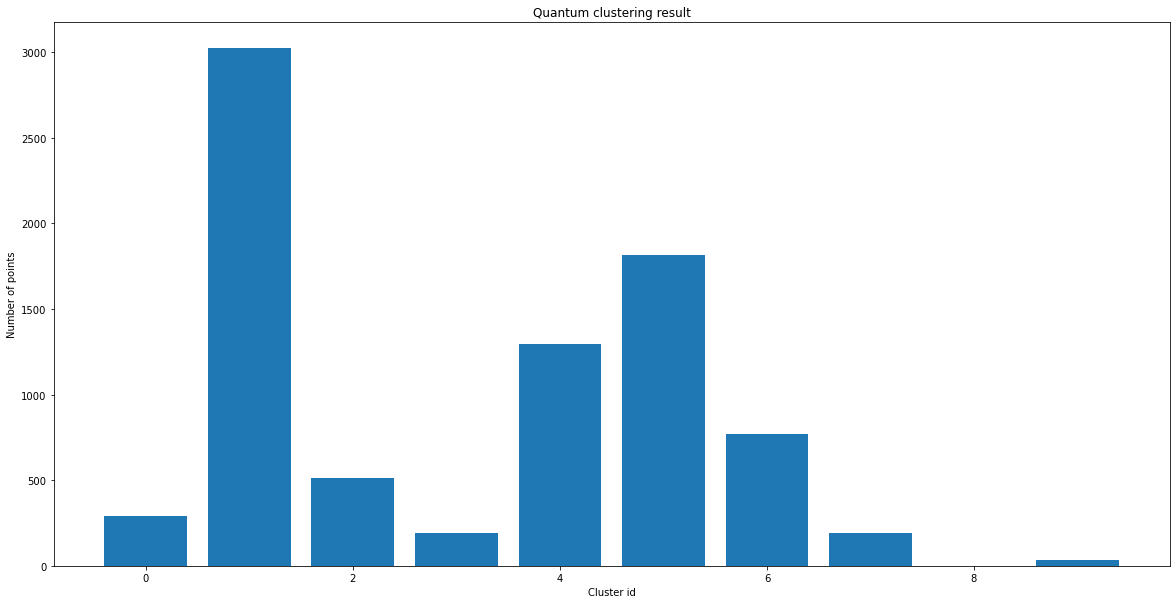

In [4]:
#Sample a smaller amount of points, as the function crashes otherwise
df_train, df_test, df_sol_train, df_sol_test = train_test_split(df, clas, test_size = 0.75, random_state = 273)
ql = Qluster(sigma = "gamma.2.75")#gamma.3 works well for this dataset
ql.fit(df_train, n_neighbors = 5, metric = 'minkowski')
clustering_ql = ql.predict(df)
data_crosstab = pd.crosstab(clustering_ql, clas, margins = False)
print(data_crosstab.transpose())
#Calculate and print purity
cm_ql = np.array(data_crosstab)
purity_ql = np.sum(np.amax(cm_ql, axis = 1))/np.sum(cm_ql)
print(f'Purity: {round(purity_ql, 6)}')
#Calculate silhouette score
sil_ql = silhouette_score(df, clustering_ql, metric='euclidean')
#Plot points per cluster
qlclustlabs = np.unique(clustering_ql)
npointsclust = np.sum(np.array(data_crosstab), axis = 1)
print(f'Silhouette score: {sil_ql}')
plt.figure(figsize=(20,10))
plt.bar(x=qlclustlabs, height=npointsclust)
plt.xlabel("Cluster id")
plt.ylabel("Number of points")
plt.title("Quantum clustering result")
plt.show()

In [5]:
clustering_ql

(array([ 2.,  1.,  2., ..., 10.,  6., 10.]),
 array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

## R models global path

In [7]:
#Modify this path so that it matches the project global path in your environment (replace ...)
global_path = r'.../AnomalyDetection2'

## ROCK (R)

In [ ]:
call1 = r'Rscript'
#Modify call2, datapath and result_path accordingly
call2 = global_path + '/RScripts/RockClustering.R'
datapath = global_path + '/Datasets/ProcMushData.csv'
n_clusters = r'20'
theta = r'0.8'
result_path = global_path + "/RClustResults/RockRes.csv"
subprocess.call([call1, call2, datapath, n_clusters, theta, result_path])

In [9]:
clustering_rock = pd.read_csv(result_path)
clustering_rock = clustering_rock.drop('Unnamed: 0',axis = 1)
clustering_rock = np.array(clustering_rock).flatten()
data_crosstab = pd.crosstab(clustering_rock, 
                            clas,
                                margins = False)
print(data_crosstab.transpose())
#Calculate and print purity
cm_rock = np.array(data_crosstab)
purity_rock = np.sum(np.amax(cm_rock, axis = 1))/np.sum(cm_rock)
print(f'Purity: {round(purity_rock, 6)}')
#Calculate silhouette score
sil_rock = silhouette_score(df_bool, clustering_rock, metric='euclidean')
print(f'Silhouette score: {sil_rock}')

row_0   1    2    3   4   5     6     7    8    9    10  ...  12  13  14  15  \
col_0                                                    ...                   
e        0  704  768  96  96  1728     0    0    0  192  ...  48  32  48   0   
p      256    0    0   0   0     0  1296  192  288    0  ...   0  72   0  32   

row_0  16   17   18  19  20  21  
col_0                            
e       0  192  288   0   0  16  
p       8    0    0  36   8   0  

[2 rows x 21 columns]
Purity: 0.996061
Silhouette score: 0.2497982800381731


## HDBSCAN (R)

In [ ]:
call1 = r'Rscript'
call2 = global_path + '/RScripts/HBDSCANClusteringR.R'
datapath = global_path + '/Datasets/OHEMushroom.csv'
pmin = r'10'
result_path = global_path + "/RClustResults/HDBSCANRes.csv"
subprocess.call([call1, call2, datapath, pmin, result_path])

In [11]:
clustering_hdbscan = pd.read_csv(result_path)
clustering_hdbscan = clustering_hdbscan.drop('Unnamed: 0',axis = 1)
clustering_hdbscan = np.array(clustering_hdbscan).flatten()
data_crosstab = pd.crosstab(clustering_hdbscan, 
                            clas,
                                margins = False)
print(data_crosstab.transpose())
#Calculate and print purity
cm_hdbscan = np.array(data_crosstab)
purity_hdbscan = np.sum(np.amax(cm_hdbscan, axis = 1))/np.sum(cm_hdbscan)
print(f'Purity: {round(purity_hdbscan, 6)}')
#Calculate silhouette score
sil_hdbscan = silhouette_score(df_bool, clustering_hdbscan, metric='euclidean')
print(f'Silhouette score: {sil_hdbscan}')

row_0   0   1    2   3   4     5     6   7   8    9   10  11   12   13   14  \
col_0                                                                         
e      109   0  192  16  48     0     0   0  48  192   0  19  288  768    0   
p       17  36    0   0   0  1296  1728  31   0    0  72   0    0    0  288   

row_0    15   16   17   18   19  
col_0                            
e      1728   96  192  512    0  
p         0  192    0    0  256  
Purity: 0.986091
Silhouette score: 0.257491655794522
